# WeatherPy

### Observed Trends
* We prove that there is a strong, linear relationship between latitude and temperature, as seen in the regressional models below for both the northern and southern hemispheres. As you approach 0 degrees latitude, temperatures increase. We also see high temperatures around the 20 degree latitude mark which can be an indication of the Earth's tilt on the axis.
* There proves to be little to no linear relationship between latitude and humidity, cloudiness and wind speed.
* There is a cluster of points around 0%, 20%, 40%, 75% and 100% cloudiness. It would be interesting to further analyze why this is. We can potentially compare cloudiness with other factors such as longitude, altitude, average temperatures, etc.
* Wind speed tends to stay low between 0-15 mph regardless of latitude. However, it would be interesting to further analyze the relationship between wind speed and altitude.

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
# from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
# create empty lists for holding latitudes/longitudes and cities
lat_lngs_list = []
cities_list = []

# create a set of random latitude and longitdue combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs_list = zip(lats, lngs)

# identify the nearest city for each latitude and longitdue combination
for lat_lng in lat_lngs_list:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # if the city is returned, add it to cities list
    if city not in cities_list:
        cities_list.append(city)

# print city count
len(cities_list)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# create empty list to append and build our data frame
city_list = []
temps = []
humidity = []
clouds = []
winds = []
lats = []
longs = []
countries = []
date = []

# set url
units = "imperial"
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q='

In [4]:
# loop through cities and append empty list
counter = 0
set_counter = 1

print(f'''Beginning Data Retrieval
------------------------------------''')
for city in cities_list:
    try:
        response = requests.get(url + city.replace(" ", "&")).json()
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        longs.append(response['coord']['lon'])
        temps.append(response['main']['temp_max'])
        winds.append(response['wind']['speed'])
        date.append(response['dt'])
        if counter > 48:
            counter = 1
            set_counter += 1
            city_list.append(city)
        else:
            counter += 1
            city_list.append(city)
        print(f"Processing Record {counter} of Set {set_counter} | {city}")
    except:
        print("City not found. Skipping...")
print(f'''------------------------------------
Data Retrieval Complete
------------------------------------''')

Beginning Data Retrieval
------------------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | kukushtan
Processing Record 4 of Set 1 | ewa beach
Processing Record 5 of Set 1 | christchurch
Processing Record 6 of Set 1 | pevek
Processing Record 7 of Set 1 | kalaleh
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | fuerte
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | mahebourg
Processing Record 13 of Set 1 | waipawa
Processing Record 14 of Set 1 | lubao
Processing Record 15 of Set 1 | barinas
Processing Record 16 of Set 1 | belmonte
Processing Record 17 of Set 1 | kruisfontein
Processing Record 18 of Set 1 | balkanabat
Processing Record 19 of Set 1 | buena vista
Processing Record 20 of Set 1 | mys shmidta
Processing Record 21 of Set 1 | birin
Processing Record 22 of Set 1 | busselton
City not found. Skipping...
Processing Record

Processing Record 39 of Set 4 | hamilton
City not found. Skipping...
Processing Record 40 of Set 4 | gonen
Processing Record 41 of Set 4 | kayerkan
City not found. Skipping...
Processing Record 42 of Set 4 | macusani
Processing Record 43 of Set 4 | rio gallegos
Processing Record 44 of Set 4 | acapulco
City not found. Skipping...
Processing Record 45 of Set 4 | avarua
Processing Record 46 of Set 4 | bambanglipuro
Processing Record 47 of Set 4 | saint-philippe
Processing Record 48 of Set 4 | sorland
City not found. Skipping...
Processing Record 49 of Set 4 | alice
Processing Record 1 of Set 5 | valdivia
Processing Record 2 of Set 5 | thompson
Processing Record 3 of Set 5 | beringovskiy
Processing Record 4 of Set 5 | bontang
Processing Record 5 of Set 5 | mujiayingzi
Processing Record 6 of Set 5 | katsuura
Processing Record 7 of Set 5 | lengshuitan
Processing Record 8 of Set 5 | husavik
City not found. Skipping...
Processing Record 9 of Set 5 | ponta do sol
Processing Record 10 of Set 5 |

Processing Record 24 of Set 8 | morros
City not found. Skipping...
Processing Record 25 of Set 8 | araouane
City not found. Skipping...
Processing Record 26 of Set 8 | tiznit
Processing Record 27 of Set 8 | vilhena
Processing Record 28 of Set 8 | sakaraha
City not found. Skipping...
Processing Record 29 of Set 8 | alta floresta
Processing Record 30 of Set 8 | nhulunbuy
Processing Record 31 of Set 8 | tiarei
Processing Record 32 of Set 8 | yar-sale
Processing Record 33 of Set 8 | morro bay
Processing Record 34 of Set 8 | malegaon
Processing Record 35 of Set 8 | dubai
Processing Record 36 of Set 8 | ukiah
Processing Record 37 of Set 8 | kota kinabalu
Processing Record 38 of Set 8 | ginda
Processing Record 39 of Set 8 | dyurtyuli
Processing Record 40 of Set 8 | ellisras
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | benxi
Processing Record 43 of Set 8 | inirida
Processing Record 44 of Set 8 | iquitos
City not found. Skipping...
Processing Record 45 of Set 8 | gran

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# now that we appended data into our empty lists, we can now turn our lists into a dictionary then into a data frame
weather_dict = {
    "City":city_list,
    "Lat":lats,
    "Lng":longs,
    "Max Temp":temps,
    "Humidity":humidity,
    "Cloudiness":clouds,
    "Wind Speed":winds,
    "Country":countries,
    "Date":date,
}

In [6]:
# create data frame from dictionary
df_weather = pd.DataFrame(weather_dict)
df_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,48.99,75,32,3.00,NZ,1620781739
1,tiksi,71.6872,128.8694,22.77,89,51,3.27,RU,1620781740
2,kukushtan,57.6464,56.4952,48.20,81,0,3.51,RU,1620781740
3,ewa beach,-8.6235,122.5073,78.44,61,51,3.96,ID,1620781741
4,christchurch,-43.5333,172.6333,52.00,87,75,16.11,NZ,1620781702


In [7]:
df_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,5.350000e+02
mean,21.973539,22.045644,62.236542,70.028037,49.863551,7.440037,1.620782e+09
std,32.704329,88.237218,17.244858,21.347516,40.715811,4.905932,1.024882e+02
min,-54.800000,-179.166700,17.600000,6.000000,0.000000,0.220000,1.620781e+09
25%,-6.934850,-49.790800,50.000000,58.000000,3.000000,3.800000,1.620782e+09
50%,27.752300,25.946900,62.600000,75.000000,51.000000,6.200000,1.620782e+09
75%,49.408500,96.147600,77.575000,87.000000,94.000000,9.520000,1.620782e+09
max,78.218600,179.316700,95.000000,100.000000,100.000000,31.070000,1.620782e+09


In [67]:
# export data frame into csv
df_weather.to_csv("../output_data/Cities.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
df_weather['Humidity'].max()

100

In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latidude vs. Temperature Plot

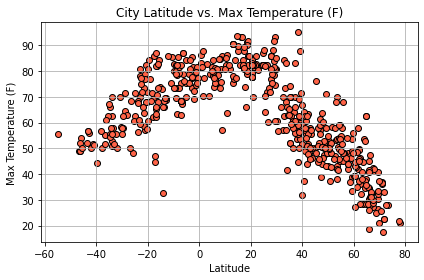

In [12]:
# determine your fig and ax
fig, ax = plt.subplots()

# determine your plot type (scatter) and set x and y coordinates
ax.scatter(df_weather['Lat'], df_weather['Max Temp'], color="tomato", edgecolor="black")

# set labels and title
ax.set(xlabel = "Latitude",
      ylabel = "Max Temperature (F)",
      title = "City Latitude vs. Max Temperature (F)")

# apply grid
ax.grid()

# display scatter plot
fig.tight_layout()

# save scatter plot to png file
fig.savefig("../output_data/Latitude vs Temperature.png")

Plot Analysis
* The scatter plot above analyzes the relationship between latitude of a city and the max temperature recorded of that city.
* We can see from the scatter plot that temperature peaks at around 0-20 degrees latitude.
* On each side of this peak, there appears to be a possible linear relationship between latitude and temperature as we see each point on the scatter plot move in the same direction. A regression model will help us determine if there is a linear relationship.

## Latitude vs. Humidity Plot

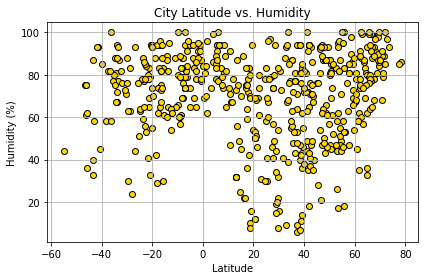

In [14]:
# determine your fig and ax
fig1, ax1 = plt.subplots()

# determine your plot type (scatter) and set x and y coordinates
ax1.scatter(df_weather['Lat'], df_weather['Humidity'], color="gold", edgecolor="black")

# set labels and title
ax1.set(xlabel = "Latitude",
      ylabel = "Humidity (%)",
      title = "City Latitude vs. Humidity")

# apply grid
ax1.grid()

# display scatter plot
fig1.tight_layout()

# save scatter plot to png file
fig1.savefig("../output_data/Latitude vs Humidity.png")

Plot Analysis
* The scatter plot above analyzes the relationship between latitude of a city and the humidity percentage of that city
* There does not appear to be any type of linear relationship between latitude of a city and its humidity due to the points on the scatter plot being relatively spread out throughout. There is no significant cluster. However, we will be able to prove this with a regression model.

## Latitude vs. Cloudiness Plot

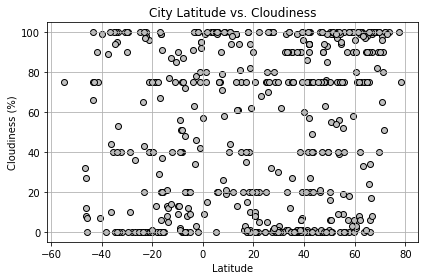

In [65]:
# determine your fig and ax
fig2, ax2 = plt.subplots()

# determine your plot type (scatter) and set x and y coordinates
ax2.scatter(df_weather['Lat'], df_weather['Cloudiness'], color="silver", edgecolor="black")

# set labels and title
ax2.set(xlabel = "Latitude",
      ylabel = "Cloudiness (%)",
      title = "City Latitude vs. Cloudiness")

# apply grid
ax2.grid()

# display scatter plot
fig2.tight_layout()

# save scatter plot to png file
fig2.savefig("../output_data/Latitude vs Cloudiness.png")

Plot Analysis
* The scatter plot above analyzes the relationship between latitude of a city and the cloudiness of that city
* There does not seem to be any type of particular relationship, but we do see horizontal clusters around 0%, 20%, 40%, 75% and 100% cloudiness.

## Latitude vs. Wind Speed Plot

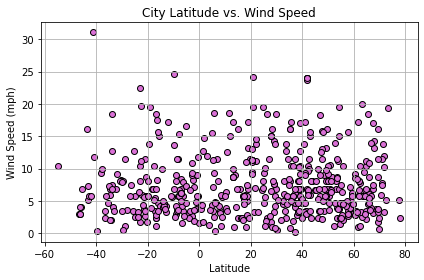

In [18]:
# determine your fig and ax
fig3, ax3 = plt.subplots()

# determine your plot type (scatter) and set x and y coordinates
ax3.scatter(df_weather['Lat'], df_weather['Wind Speed'], color="orchid", edgecolor="black")

# set labels and title
ax3.set(xlabel = "Latitude",
      ylabel = "Wind Speed (mph)",
      title = "City Latitude vs. Wind Speed")

# apply grid
ax3.grid()

# display scatter plot
fig3.tight_layout()

# save scatter plot to png file
fig3.savefig("../output_data/Latitude vs Wind Speed.png")

Plot Analysis
* The scatter plot above analyzes the relationship between latitude of a city and the wind speed of that city
* There does not appear to be any relationship between latitude and wind speed. There are clusters of relatively low wind speeds spread throughout latitudes with a few outliers of higher wind speeds.

## Linear Regression

In [20]:
# separate the plots into Northern Hemisphere (>=0 degrees latitude) and Southern Hemisphere (<0 degrees latitude)
df_northern_hemisphere = df_weather.loc[(df_weather['Lat']>=0)]
df_southern_hemisphere = df_weather.loc[(df_weather['Lat']<0)]

## Northern Hemisphere - Max Temp vs Latitude Linear Regression

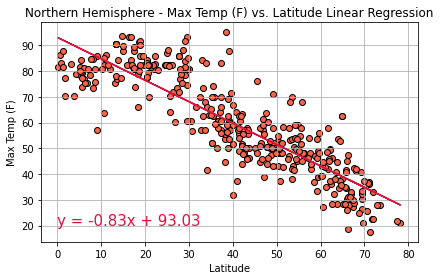

In [21]:
# perform a linear regression on latitude and max temp
(slope, intercept, rvalue, pvalue, stderror) = st.linregress(df_northern_hemisphere['Lat'], df_northern_hemisphere['Max Temp'])
prediction = slope * df_northern_hemisphere['Lat'] + intercept

# plot scatter plot and regression line
fig4, ax4 = plt.subplots()
ax4.scatter(df_northern_hemisphere['Lat'], df_northern_hemisphere['Max Temp'], color="tomato", edgecolor="black")
ax4.plot(df_northern_hemisphere['Lat'], prediction, color="crimson")

# annotate regression line formula
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax4.annotate(line_equation,(0,20), fontsize=15, color="crimson")

# set labels and title
ax4.set(xlabel = "Latitude",
       ylabel = "Max Temp (F)",
       title = "Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression")

# apply grid
ax4.grid()

# display
fig4.tight_layout()

# save regression to png file
fig4.savefig("../output_data/Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression.png")

In [22]:
print(f"The r-value is: {rvalue}")

The r-value is: -0.8707075284876634


## Southern Hemisphere - Max Temp vs Latitude Linear Regression

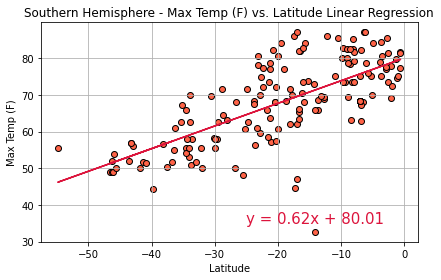

In [24]:
# perform a linear regression on latitude and max temp
(slope, intercept, rvalue, pvalue, stderror) = st.linregress(df_southern_hemisphere['Lat'], df_southern_hemisphere['Max Temp'])
prediction = slope * df_southern_hemisphere['Lat'] + intercept

# plot scatter plot and regression line
fig5, ax5 = plt.subplots()
ax5.scatter(df_southern_hemisphere['Lat'], df_southern_hemisphere['Max Temp'], color="tomato", edgecolor="black")
ax5.plot(df_southern_hemisphere['Lat'], prediction, color="crimson")

# annotate regression line formula
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax5.annotate(line_equation,(-25,35), fontsize=15, color="crimson")

# set labels and title
ax5.set(xlabel = "Latitude",
       ylabel = "Max Temp (F)",
       title = "Southern Hemisphere - Max Temp (F) vs. Latitude Linear Regression")

# apply grid
ax5.grid()

# display
fig5.tight_layout()

# save regression to png file
fig5.savefig("../output_data/Southern Hemisphere - Max Temp (F) vs. Latitude Linear Regression.png")

In [25]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.702483230309904


Regression Analysis

* With r-values of -0.87 and 0.70 respectively, this indicates there is a very strong relationship between temperature and latitude in the northern and southern hemispheres.
* There is a negative lineaer correlation in the northern hemisphere. As latitude increases (as you move away from the equator) temperatures decrease, and vice versa.
* There is a positive linear correlation in the southern hemisphere. As latitude increases (as you move towards the equator) temperatures increase, and vice versa.

## Northern Hemisphere - Humidity vs Latitude Linear Regression

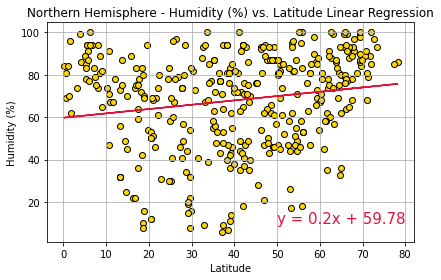

In [27]:
# perform a linear regression on latitude and humidity
(slope, intercept, rvalue, pvalue, stderror) = st.linregress(df_northern_hemisphere['Lat'], df_northern_hemisphere['Humidity'])
prediction = slope * df_northern_hemisphere['Lat'] + intercept

# plot scatter plot and regression line
fig6, ax6 = plt.subplots()
ax6.scatter(df_northern_hemisphere['Lat'], df_northern_hemisphere['Humidity'], color="gold", edgecolor="black")
ax6.plot(df_northern_hemisphere['Lat'], prediction, color="crimson")

# annotate regression line formula
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax6.annotate(line_equation,(50,10), fontsize=15, color="crimson")

# set labels and title
ax6.set(xlabel = "Latitude",
       ylabel = "Humidity (%)",
       title = "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# apply grid
ax6.grid()

# display
fig6.tight_layout()

# save regression to png file
fig6.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

In [28]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.1742532781729457


## Southern Hemisphere - Humidity vs Latitude Linear Regression

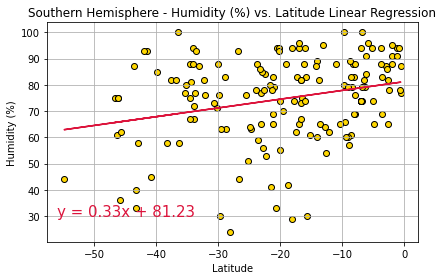

In [30]:
# perform a linear regression on latitude and humidity
(slope, intercept, rvalue, pvalue, stderror) = st.linregress(df_southern_hemisphere['Lat'], df_southern_hemisphere['Humidity'])
prediction = slope * df_southern_hemisphere['Lat'] + intercept

# plot scatter plot and regression line
fig7, ax7 = plt.subplots()
ax7.scatter(df_southern_hemisphere['Lat'], df_southern_hemisphere['Humidity'], color="gold", edgecolor="black")
ax7.plot(df_southern_hemisphere['Lat'], prediction, color="crimson")

# annotate regression line formula
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax7.annotate(line_equation,(-56,30), fontsize=15, color="crimson")

# set labels and title
ax7.set(xlabel = "Latitude",
       ylabel = "Humidity (%)",
       title = "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# apply grid
ax7.grid()

# display
fig7.tight_layout()

# save regression to png file
fig7.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

In [31]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.2667033709534736


Regression Analysis
* With r-values of 0.17 and 0.27 respectively, there is little to no correlation between latitude and humidity in the northern and southern hempispheres.
* Both r-values are positive so as latitude increases, it doesn't necessarily mean humidity will increase. More analysis is needed to determine if there is a relationship between latitude and humidity. 

## Northern Hemisphere - Cloudiness vs Latitude Linear Regression

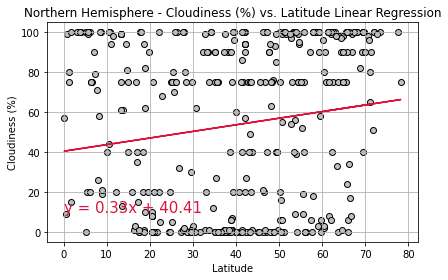

In [33]:
# perform a linear regression on latitude and cloudiness
(slope, intercept, rvalue, pvalue, stderror) = st.linregress(df_northern_hemisphere['Lat'], df_northern_hemisphere['Cloudiness'])
prediction = slope * df_northern_hemisphere['Lat'] + intercept

# plot scatter plot and regression line
fig8, ax8 = plt.subplots()
ax8.scatter(df_northern_hemisphere['Lat'], df_northern_hemisphere['Cloudiness'], color="silver", edgecolor="black")
ax8.plot(df_northern_hemisphere['Lat'], prediction, color="crimson")

# annotate regression line formula
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax8.annotate(line_equation,(0,10), fontsize=15, color="crimson")

# set labels and title
ax8.set(xlabel = "Latitude",
       ylabel = "Cloudiness (%)",
       title = "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# apply grid
ax8.grid()

# display
fig8.tight_layout()

# save regression to png file
fig8.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

In [34]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.15815348431433193


##  Southern Hemisphere - Cloudiness vs. Latitude Linear Regression

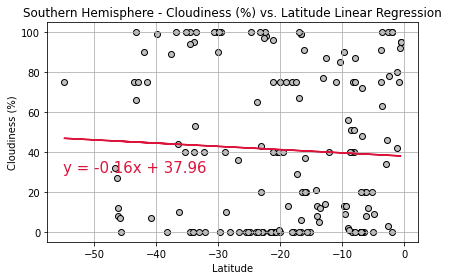

In [36]:
# perform a linear regression on latitude and cloudiness
(slope, intercept, rvalue, pvalue, stderror) = st.linregress(df_southern_hemisphere['Lat'], df_southern_hemisphere['Cloudiness'])
prediction = slope * df_southern_hemisphere['Lat'] + intercept

# plot scatter plot and regression line
fig9, ax9 = plt.subplots()
ax9.scatter(df_southern_hemisphere['Lat'], df_southern_hemisphere['Cloudiness'], color="silver", edgecolor="black")
ax9.plot(df_southern_hemisphere['Lat'], prediction, color="crimson")

# annotate regression line formula
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax9.annotate(line_equation,(-55,30), fontsize=15, color="crimson")

# set labels and title
ax9.set(xlabel = "Latitude",
       ylabel = "Cloudiness (%)",
       title = "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# apply grid
ax9.grid()

# display
fig9.tight_layout()

# save regression to png file
fig9.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

In [37]:
print(f"The r-value is: {rvalue}")

The r-value is: -0.054591400287126196


Regression Analysis
* With r-values of 0.16 and -0.05 respectively, there is no correlation between latitude and cloudiness in the northern and southern hempispheres.
* The 0.16 r-value in the northern hemisphere is positive so as latitude increases, it doesn't necessarily mean cloudiness will increase. More analysis is needed to determine if there is a relationship between latitude and cloudiness in the northern hemisphere.
* The -0.05 r-value in the southern hemisphere is negative so as latitude increases, it doesn't necessarily mean cloudiness will decrease. More analysis is needed to determine if there is a relationship between latitude and cloudiness in the southern hemisphere.

##  Northern Hemisphere - Wind Speed vs. Latitude Linear Regression

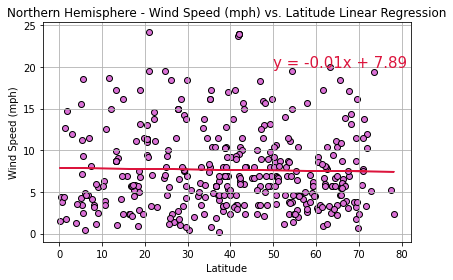

In [39]:
# perform a linear regression on latitude and wind speed
(slope, intercept, rvalue, pvalue, stderror) = st.linregress(df_northern_hemisphere['Lat'], df_northern_hemisphere['Wind Speed'])
prediction = slope * df_northern_hemisphere['Lat'] + intercept

# plot scatter plot and regression line
fig10, ax10 = plt.subplots()
ax10.scatter(df_northern_hemisphere['Lat'], df_northern_hemisphere['Wind Speed'], color="orchid", edgecolor="black")
ax10.plot(df_northern_hemisphere['Lat'], prediction, color="crimson")

# annotate regression line formula
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax10.annotate(line_equation,(50,20), fontsize=15, color="crimson")

# set labels and title
ax10.set(xlabel = "Latitude",
       ylabel = "Wind Speed (mph)",
       title = "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# apply grid
ax10.grid()

# display
fig10.tight_layout()

# save regression to png file
fig10.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

In [40]:
print(f"The r-value is: {rvalue}")

The r-value is: -0.02298952782095232


##  Southern Hemisphere - Wind Speed vs. Latitude Linear Regression

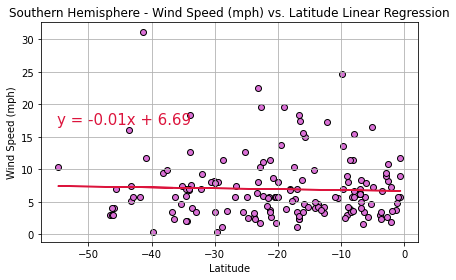

In [42]:
# perform a linear regression on latitude and wind speed
(slope, intercept, rvalue, pvalue, stderror) = st.linregress(df_southern_hemisphere['Lat'], df_southern_hemisphere['Wind Speed'])
prediction = slope * df_southern_hemisphere['Lat'] + intercept

# plot scatter plot and regression line
fig11, ax11 = plt.subplots()
ax11.scatter(df_southern_hemisphere['Lat'], df_southern_hemisphere['Wind Speed'], color="orchid", edgecolor="black")
ax11.plot(df_southern_hemisphere['Lat'], prediction, color="crimson")

# annotate regression line formula
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax11.annotate(line_equation,(-55,17), fontsize=15, color="crimson")

# set labels and title
ax11.set(xlabel = "Latitude",
       ylabel = "Wind Speed (mph)",
       title = "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# apply grid
ax11.grid()

# display
fig11.tight_layout()

# save regression to png file
fig11.savefig("../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

In [43]:
print(f"The r-value is: {rvalue}")

The r-value is: -0.03638646589122802


Regression Analysis
* With r-values of -0.02 and -0.04 respectively, there is little to no correlation between latitude and wind speed in the northern and southern hempispheres.
* Both r-values are negative so as latitude increases, it doesn't necessarily mean humidity will decrease. More analysis is needed to determine if there is a relationship between latitude and wind speed. 